### Instructions

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the lesson: 

**Satellite Imagery Analysis I - EDA Using EarthPy**

---

#### Problem Statement

As a data scientist using remote sensing data, track changes in vegetation that are affected by the fire, understand the area and intensity of fires. 

---

#### Dataset Description

The Cold Springs wildfire was first reported on July 9, 2016, along with Hurricane Hill, approximately two miles northeast of Nederland, Colorado, US. The Landsat program is a series of Earth-observing satellite missions jointly managed by NASA and the U.S. Geological Survey. So, we will work on the images taken by Landsat during Cold Springs Wildfire.

The naming convention followed by Landsat is: 

**LXSS_LLLL_PPPRRR_YYYYMMDD_yyyymmdd_CC_TX**

Where, 
    
    L = Landsat
    X = Sensor Used 
    SS = Satellite 
    LLLL = Processing correction level
    PPP = WRS path
    RRR = WRS row
    YYYYMMDD = Acquisition year, month, day
    yyyymmdd - Processing year, month, day
    CC = Collection number
    TX = Collection category
    
Example:  **LC08_L1GT_029030_20151209_20160131_01_RT**

Means: Landsat 8; OLI/TIRS combined; processing correction level L1GT; path 029; row 030; acquired December 9, 2015; processed January 31, 2016; Collection 1; Real-Time

**Dataset source:** https://figshare.com/articles/dataset/Earth_Analytics_Cold_Springs_Fire_Remote_Sensing_Data/6083210

---

### List of Activities
 
**Activity 1:** Import Modules and Read Data

**Activity 2:** Plotting RGB Composite Image



---

#### Activity 1: Import Modules and Read Data

1. Import the necessary Python modules and download the `cold-springs-fire` dataset from the `earthpy` package.

2. Get the files containing the `band` word and that end with `.tif` using `glob()` function. 

In [1]:
# Install 'earthpy' package
!pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 51.9 MB/s eta 0:00:00


Download `cold-springs-fire` dataset from the `earthpy` package.



In [2]:
import earthpy as ep
print(ep.data)

Available Datasets: ['california-rim-fire', 'co-flood-extras', 'cold-springs-fire', 'cold-springs-landsat-scenes', 'cold-springs-modis-h4', 'colorado-flood', 'cs-test-landsat', 'cs-test-naip', 'naip-fire-crop', 'ndvi-automation', 'spatial-vector-lidar', 'twitter-flood', 'vignette-elevation', 'vignette-landsat']


In [4]:
# Import the 'earthpy' library
import earthpy as ep

# Specify a custom directory for data downloads using the 'path' attribute.
ep.data.path="."
ep.data.get_data("cold-springs-fire")

# Specify the dataset name to download using 'data.get_data()' function.


Extracted output to ./cold-springs-fire/.


'./cold-springs-fire/.'


Get files containing the word `band` and that end with `.tif`.

Steps to obtain the files:
1. Import `glob` module as `gb`.

2. Use `glob()` function of `gb` and pass the pattern of the file name. 

  The pattern would be: `cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/*band*.tif`

3. Sort the files and display the extracted paths.

In [5]:
# Import the 'glob' library
import glob as gb
path=gb.glob("cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/*band*.tif")
path.sort()
# Grab files containing the word "band" and that end with .tif


# Sort the Bands


Creating a stacked image using `stack()` function.

To create an image stack for Landsat data, perform the following steps:

1. Import `earthpy.spatial` as `es`.
2. Call `stack()` function and pass the sorted list of 7 spectral bands as input to this function. And store result in 2 variables (stacked array and metadata).
3. Create a `for` loop with metadata and print each feature in the stacked array.

In [6]:
# Import the 'earthpy.spatial' library
import earthpy.spatial as es
array_st,meta=es.stack(list(path))

# Create image stack for Landsat


# Print the metadata 
print(meta)

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 246, 'height': 177, 'count': 7, 'crs': CRS.from_epsg(32613), 'transform': Affine(30.0, 0.0, 455655.0,
       0.0, -30.0, 4428465.0), 'blockysize': 16, 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


**Q:** How many bands are there in the stacked image?

**A:** 



---



#### Activity 2: Plotting RGB Composite Image

1. Plot all the bands from the dataset using the `plot_bands()` function with suitable titles for each band.

2. Plot RGB Stretched Image using `plot_rgb()` function.

Plot the bands using `plot_bands()` function with their respective titles. The band titles must be:

  `band_titles = ["Coastal", "Blue", "Green", "Red", "NIR", "SWIR 1", "SWIR 2"]`


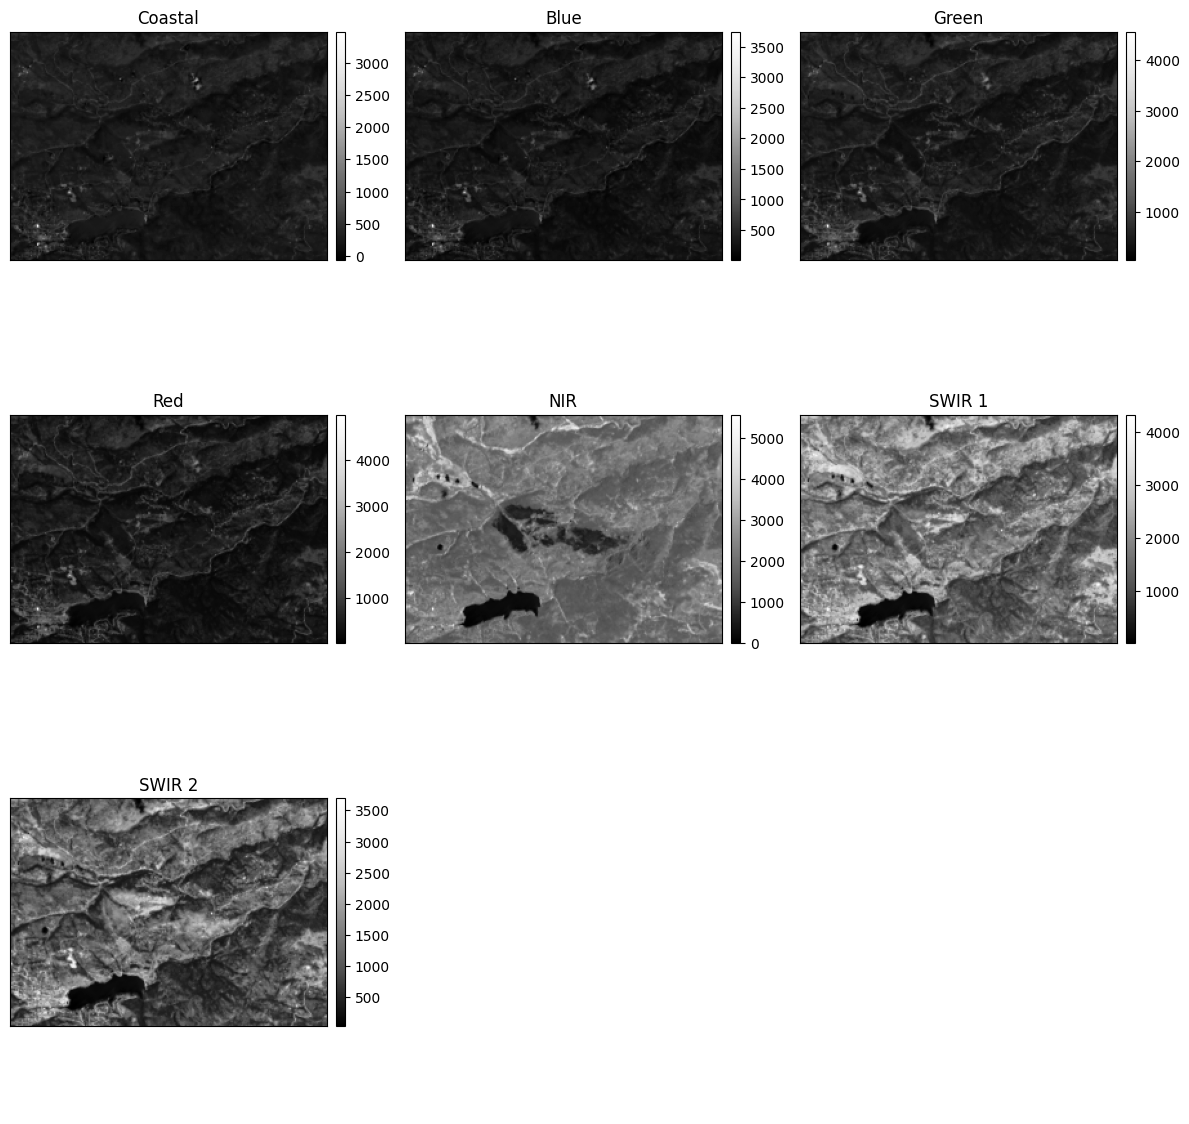

In [10]:
# Import 'earthpy.plot' and 'matplotlib.pyplot' 
import earthpy.plot as epp
import matplotlib.pyplot as plt

# Create a list containing names of bands
band_titles = ["Coastal", "Blue", "Green", "Red", "NIR", "SWIR 1", "SWIR 2"]

# Plot the bands using the title
epp.plot_bands(array_st,title=band_titles)
plt.show()

Plot the RGB stretched Image with a title using the `plot_rgb()` function. 

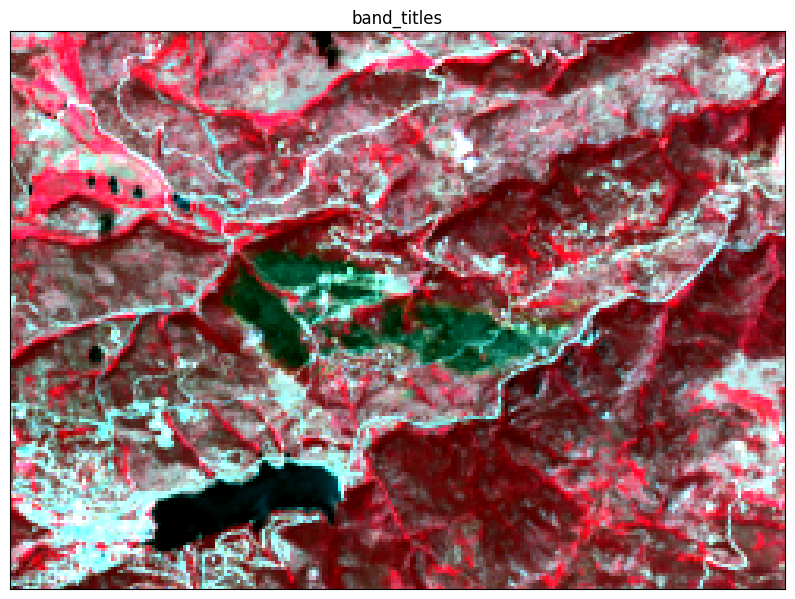

In [15]:
# Plot the RGB stretched Image
epp.plot_rgb(array_st,rgb=(4,3,2),stretch=True,str_clip=4,title="band_titles")
plt.show()


**Q:** Which portion could be affected by the fire? 

**A:** 



---

